![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/04.0.Clinical_DeIdentification.ipynb)


# Clinical Deidentification

## Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -q johnsnowlabs==5.1.0

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, medical

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.install()

In [ ]:
from johnsnowlabs import nlp, medical
import pandas as pd
import json
import string
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Automatically load license data and start a session with all jars user has access to

spark = nlp.start()
spark

👌 Detected license file /content/5.1.0.spark_nlp_for_healthcare.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==5.1.0, 💊Spark-Healthcare==5.1.0, running on ⚡ PySpark==3.1.2


In [ ]:
from pyspark.sql import DataFrame
import pyspark.sql.functions as F
import pyspark.sql.types as T
import pyspark.sql as SQL
from pyspark import keyword_only

# Deidentification Model

Protected Health Information:
- individual’s past, present, or future physical or mental health or condition
- provision of health care to the individual
- past, present, or future payment for the health care

Protected health information includes many common identifiers (e.g., name, address, birth date, Social Security Number) when they can be associated with the health information.

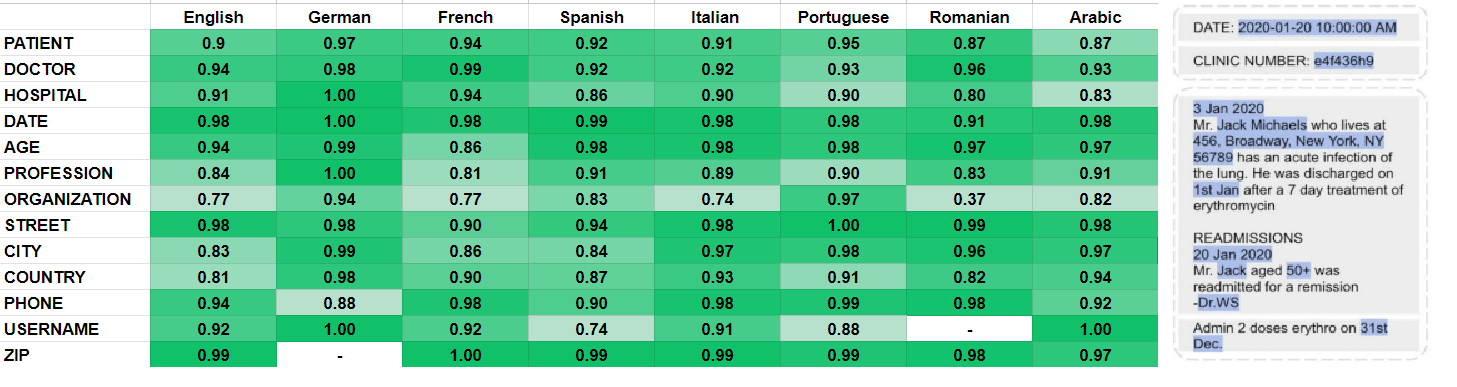

<center><b>Deidentification NER Models for English</b></center>

|index|model|lang|index|model|lang|index|model|lang|
|-----:|:-----|----|-----:|:-----|----|-----:|:-----|----|
| 1| [deidentify_dl](https://nlp.johnsnowlabs.com/2021/01/28/deidentify_dl_en.html)  |en| 7| [ner_deid_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_enriched_biobert_en.html)  |en| 13| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2021/09/03/ner_deid_subentity_augmented_en.html)  |en|
| 2| [deidentify_large](https://nlp.johnsnowlabs.com/2020/08/04/deidentify_large_en.html)  |en| 8| [ner_deid_generic_augmented](https://nlp.johnsnowlabs.com/2021/06/30/ner_deid_generic_augmented_en.html)  |en| 14| [ner_deid_subentity_augmented_i2b2](https://nlp.johnsnowlabs.com/2021/11/29/ner_deid_subentity_augmented_i2b2_en.html)  |en|
| 3| [deidentify_rb](https://nlp.johnsnowlabs.com/2019/06/04/deidentify_rb_en.html)  |en| 9| [ner_deid_generic_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_generic_glove_en.html)  |en| 15| [ner_deid_subentity_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_subentity_glove_en.html)  |en|
| 4| [ner_deid_augmented](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_augmented_en.html)  |en| 10| [ner_deid_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_large_en.html)  |en| 16| [ner_deid_synthetic](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_synthetic_en.html)  |en|
| 5| [ner_deid_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_biobert_en.html)  |en| 11| [ner_deid_sd](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_en.html)  |en| 17| [ner_deidentify_dl](https://nlp.johnsnowlabs.com/2021/03/31/ner_deidentify_dl_en.html)  |en|
| 6| [ner_deid_enriched](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_enriched_en.html)  |en| 12| [ner_deid_sd_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_large_en.html)  |en| | |


<center><b>Deidentification NER Models for Other Languages</b></center>

|index|model|lang|index|model|lang|
|-----:|:-----|----|-----:|:-----|----|
| 1| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/01/06/ner_deid_generic_de.html)  |de| 14| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/02/11/ner_deid_generic_fr.html)  |fr|
| 2| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/01/06/ner_deid_subentity_de.html)  |de| 15| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/02/14/ner_deid_subentity_fr.html)  |fr|
| 3| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/01/18/ner_deid_generic_es.html)  |es| 16| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/03/25/ner_deid_generic_it_3_0.html)  |it|
| 4| [ner_deid_generic_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_generic_augmented_es.html)  |es| 17| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/03/25/ner_deid_subentity_it_2_4.html)  |it|
| 5| [ner_deid_generic_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_generic_roberta_es.html)  |es| 18| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/04/13/ner_deid_generic_pt_3_0.html)  |pt|
| 6| [ner_deid_generic_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_generic_roberta_augmented_es.html)  |es| 19| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/04/13/ner_deid_subentity_pt_3_0.html)  |pt|
| 7| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/01/18/ner_deid_subentity_es.html)  |es| 20| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_subentity_ro_3_0.html)  |ro|
| 8| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_subentity_augmented_es.html)  |es| 21| [ner_deid_subentity_bert](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_subentity_bert_ro_3_0.html)  |ro|
| 9| [ner_deid_subentity_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_subentity_roberta_es.html)  |es| 22| [ner_deid_generic](https://nlp.johnsnowlabs.com/models)  |ro|
| 10| [ner_deid_subentity_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_subentity_roberta_augmented_es.html)  |es| 23| [ner_deid_generic_bert](https://nlp.johnsnowlabs.com/models)  |ro|
| 11| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2023/05/31/ner_deid_subentity_ar.html)  |ar| 24| [ner_deid_generic](https://nlp.johnsnowlabs.com/2023/05/30/ner_deid_generic_ar.html)  |ar|
 12|[`ner_deid_subentity_arabert`](https://nlp.johnsnowlabs.com/2023/09/16/ner_deid_subentity_arabert_en.html)   |ar| 25|[`ner_deid_generic_arabert`](https://nlp.johnsnowlabs.com/2023/09/16/ner_deid_generic_arabert_en.html)   |ar|
 13| [`ner_deid_subentity_camelbert`](https://nlp.johnsnowlabs.com/2023/09/22/ner_deid_subentity_camelbert_en.html) |ar| 26| [`ner_deid_generic_camelbert`](https://nlp.johnsnowlabs.com/2023/09/16/ner_deid_generic_camelbert_en.html) |ar|


You can find German, Spanish, French, Italian, Portuguese and Romanian deidentification models and pretrained pipeline examples in this notebook:   [Clinical Multi Language Deidentification Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/04.1.Clinical_Multi_Language_Deidentification.ipynb)


**Let's start!**

Load NER pipeline to identify protected entities:

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
clinical_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")

nlpPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]


### Pretrained NER models extract:

- Name
- Profession
- Age
- Date
- Contact(Telephone numbers, FAX numbers, Email addresses)
- Location (Address, City, Postal code, Hospital Name, Employment information)
- Id (Social Security numbers, Medical record numbers, Internet protocol addresses)

In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora ,
MR # 7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 .
Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .
'''

In [ ]:
result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.ner.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

In [ ]:
result_df.select("token", "ner_label").groupBy('ner_label').count().orderBy('count', ascending=False).show(truncate=False)

+----------+-----+
|ner_label |count|
+----------+-----+
|O         |29   |
|I-LOCATION|5    |
|B-DATE    |3    |
|B-NAME    |3    |
|B-LOCATION|2    |
|I-NAME    |2    |
|B-ID      |1    |
|B-AGE     |1    |
|B-CONTACT |1    |
+----------+-----+



### Check extracted sensitive entities

In [ ]:
result.select(F.explode(F.arrays_zip(result.ner_chunk.result,
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|2093-01-13                   |DATE     |
|David Hale                   |NAME     |
|Hendrickson Ora              |NAME     |
|7194334                      |ID       |
|01/13/93                     |DATE     |
|Oliveira                     |NAME     |
|25                           |AGE      |
|2079-11-09                   |DATE     |
|Cocke County Baptist Hospital|LOCATION |
|0295 Keats Street            |LOCATION |
|55-555-5555                  |CONTACT  |
+-----------------------------+---------+



### Excluding entities from deidentification

Sometimes we need to leave some entities in the text, for example, if we want to analyze the frequency of the disease by the hospital. In this case, we need to use parameter **`setWhiteList()`** to modify `ner_chunk` output. This parameter having using a list of entities type to deidentify as an input. So, if we want to leave the location in the list we need to remove this tag from the list:

In [ ]:
ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk") \
    .setWhiteList(['NAME', 'PROFESSION', 'ID', 'AGE', 'DATE'])

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    ner_converter])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_with_white_list = nlpPipeline.fit(empty_data)

In [ ]:
result_with_white_list = model_with_white_list.transform(spark.createDataFrame([[text]]).toDF("text"))

In [ ]:
print("All Labels :")
result.select(F.explode(F.arrays_zip(result.ner_chunk.result,
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

print("WhiteListed Labels: ")
result_with_white_list.select(F.explode(F.arrays_zip(result_with_white_list.ner_chunk.result,
                                                     result_with_white_list.ner_chunk.metadata)).alias("cols")) \
                      .select(F.expr("cols['0']").alias("chunk"),
                              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

All Labels :
+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|2093-01-13                   |DATE     |
|David Hale                   |NAME     |
|Hendrickson Ora              |NAME     |
|7194334                      |ID       |
|01/13/93                     |DATE     |
|Oliveira                     |NAME     |
|25                           |AGE      |
|2079-11-09                   |DATE     |
|Cocke County Baptist Hospital|LOCATION |
|0295 Keats Street            |LOCATION |
|55-555-5555                  |CONTACT  |
+-----------------------------+---------+

WhiteListed Labels: 
+---------------+---------+
|chunk          |ner_label|
+---------------+---------+
|2093-01-13     |DATE     |
|David Hale     |NAME     |
|Hendrickson Ora|NAME     |
|7194334        |ID       |
|01/13/93       |DATE     |
|Oliveira       |NAME     |
|25             |AGE      |
|2079-11-09     |DATE     |
+---------------+---------+

## Masking and Obfuscation

### Replace these enitites with Tags

In [ ]:
ner_converter = medical.NerConverterInternal()\
      .setInputCols(["sentence", "token", "ner"])\
      .setOutputCol("ner_chunk")

deidentification = medical.DeIdentification() \
      .setInputCols(["sentence", "token", "ner_chunk"]) \
      .setOutputCol("deidentified") \
      .setMode("mask")\
      .setReturnEntityMappings(True) #  return a new column to save the mappings between the mask/obfuscated entities and original entities.
      #.setMappingsColumn("MappingCol") # change the name of the column, 'aux' is default

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      deidentification])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_deid = deidPipeline.fit(empty_data)

In [ ]:
result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))

In [ ]:
result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|        deidentified|                 aux|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|
Record date : 20...|[{document, 0, 23...|[{document, 1, 45...|[{token, 1, 6, Re...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 15, 24, ...|[{document, 0, 36...|[{chunk, 14, 19, ...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+



In [ ]:
result.select(F.explode(F.arrays_zip(result.sentence.result, result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D ."
1,", Name : Hendrickson Ora ,\nMR # 7194334 Date ...",", Name : <NAME> ,\nMR # <ID> Date : <DATE> ."
2,"PCP : Oliveira , 25 years-old , Record date : ...","PCP : <NAME> , <AGE> years-old , Record date :..."
3,"Cocke County Baptist Hospital , 0295 Keats Str...","<LOCATION> , <LOCATION> , Phone <CONTACT> ."


We have three modes to mask the entities in the Deidentification annotator. You can select the modes using the `.setMaskingPolicy()` parameter. The methods are the followings:

**“entity_labels”**: Mask with the entity type of that chunk. (default) <br/>
**“same_length_chars”**: Mask the deid entities with same length of asterix ( * ) with brackets ( [ , ] ) on both end. <br/>
**“fixed_length_chars”**: Mask the deid entities with a fixed length of asterix ( * ). The length is setting up using the `setFixedMaskLength()` method. <br/>
Let's try each of these and compare the results.

In [ ]:
#deid model with "entity_labels"
deid_entity_labels= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_entity_label")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("entity_labels")

#deid model with "same_length_chars"
deid_same_length= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_same_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("same_length_chars")

#deid model with "fixed_length_chars"
deid_fixed_length= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"])\
    .setOutputCol("deid_fixed_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("fixed_length_chars")\
    .setFixedMaskLength(4)


deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      deid_entity_labels,
      deid_same_length,
      deid_fixed_length])


empty_data = spark.createDataFrame([[""]]).toDF("text")
model_deid = deidPipeline.fit(empty_data)

In [ ]:
policy_result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))

In [ ]:
policy_result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|   deid_entity_label|                 aux|    deid_same_length|   deid_fixed_length|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|
Record date : 20...|[{document, 0, 23...|[{document, 1, 45...|[{token, 1, 6, Re...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 15, 24, ...|[{document, 0, 36...|[{chunk, 14, 17, ...|[{document, 0, 44...|[{document, 0, 32...|
+--------------------+--------------------+--------------------+----

In [ ]:
policy_result.select(F.explode(F.arrays_zip(policy_result.sentence.result,
                                            policy_result.deid_entity_label.result,
                                            policy_result.deid_same_length.result,
                                            policy_result.deid_fixed_length.result)).alias("cols")) \
             .select(F.expr("cols['0']").alias("sentence"),
                     F.expr("cols['1']").alias("deid_entity_label"),
                     F.expr("cols['2']").alias("deid_same_length"),
                     F.expr("cols['3']").alias("deid_fixed_length")).toPandas()

,sentence,deid_entity_label,deid_same_length,deid_fixed_length
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D .","Record date : [********] , [********] , M.D .","Record date : **** , **** , M.D ."
1,", Name : Hendrickson Ora ,\nMR # 7194334 Date ...",", Name : <NAME> ,\nMR # <ID> Date : <DATE> .",", Name : [*************] ,\nMR # [*****] Date ...",", Name : **** ,\nMR # **** Date : **** ."
2,"PCP : Oliveira , 25 years-old , Record date : ...","PCP : <NAME> , <AGE> years-old , Record date :...","PCP : [******] , ** years-old , Record date : ...","PCP : **** , **** years-old , Record date : **..."
3,"Cocke County Baptist Hospital , 0295 Keats Str...","<LOCATION> , <LOCATION> , Phone <CONTACT> .","[***************************] , [*************...","**** , **** , Phone **** ."


### Mapping Column

In [ ]:
result.select("aux").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
result.select(F.explode(F.arrays_zip(result.aux.metadata,
                                     result.aux.result,
                                     result.aux.begin,
                                     result.aux.end)).alias("cols")) \
      .select(F.expr("cols['0']['originalChunk']").alias("chunk"),
              F.expr("cols['0']['beginOriginalChunk']").alias("beginChunk"),
              F.expr("cols['0']['endOriginalChunk']").alias("endChunk"),
              F.expr("cols['1']").alias("label"),
              F.expr("cols['2']").alias("beginLabel"),
              F.expr("cols['3']").alias("endLabel")).show(truncate=False)

+-----------------------------+----------+--------+----------+----------+--------+
|chunk                        |beginChunk|endChunk|label     |beginLabel|endLabel|
+-----------------------------+----------+--------+----------+----------+--------+
|2093-01-13                   |15        |24      |<DATE>    |14        |19      |
|David Hale                   |28        |37      |<NAME>    |23        |28      |
|Hendrickson Ora              |56        |70      |<NAME>    |46        |51      |
|7194334                      |79        |85      |<ID>      |60        |63      |
|01/13/93                     |94        |101     |<DATE>    |72        |77      |
|Oliveira                     |111       |118     |<NAME>    |86        |91      |
|25                           |122       |123     |<AGE>     |95        |99      |
|2079-11-09                   |151       |160     |<DATE>    |127       |132     |
|Cocke County Baptist Hospital|164       |192     |<LOCATION>|135       |144     |
|029

## Reidentification

We can use `ReIdentification` annotator to go back to the original sentence.

In [ ]:
reIdentification = medical.ReIdentification()\
    .setInputCols(["aux","deidentified"])\
    .setOutputCol("original")

In [ ]:
reid_result = reIdentification.transform(result)

In [ ]:
reid_result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|        deidentified|                 aux|            original|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|
Record date : 20...|[{document, 0, 23...|[{document, 1, 45...|[{token, 1, 6, Re...|[{word_embeddings...|[{named_entity, 1...|[{chunk, 15, 24, ...|[{document, 0, 36...|[{chunk, 14, 19, ...|[{document, 1, 45...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----

In [ ]:
print(text)

reid_result.select('original.result').show(truncate=False)


Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora ,
MR # 7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 .
Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                         |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[Record date : 2093-01-13 , David Ha

## Using multiple NER in the same pipeline

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

deid_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_generic")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner_generic"])\
    .setOutputCol("ner_generic_chunk")\
    .setWhiteList(['ID', 'DATE', 'AGE', 'NAME', 'PROFESSION'])# CONTACT and LOCATION is removed

deid_ner_enriched = medical.NerModel.pretrained("ner_deid_subentity_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_subentity")

ner_converter_enriched = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "ner_subentity"]) \
    .setOutputCol("ner_subentity_chunk")\
    .setWhiteList(['COUNTRY', 'CITY', 'HOSPITAL', 'STATE', 'STREET', 'ZIP'])
    # we can also add PATIENT and DOCTOR entities and remove NAME entity from the other NER model

chunk_merge = medical.ChunkMergeApproach()\
    .setInputCols("ner_subentity_chunk","ner_generic_chunk")\
    .setOutputCol("deid_merged_chunk")

deidentification = medical.DeIdentification() \
    .setInputCols(["sentence", "token", "deid_merged_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("mask")\
    .setIgnoreRegex(True)


nlpPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      ner_converter,
      deid_ner_enriched,
      ner_converter_enriched,
      chunk_merge,
      deidentification])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[OK!]


In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR # 7194334 Date : 01/13/93 .
PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital , 0295 Keats Street , Phone 302-786-5227.
'''

In [ ]:
result = model.transform(spark.createDataFrame([[text]]).toDF("text"))

# ner_deid_generic_augmented
result.select(F.explode(F.arrays_zip(result.ner_generic_chunk.result,
                                     result.ner_generic_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+---------------+---------+
|chunk          |ner_label|
+---------------+---------+
|2093-01-13     |DATE     |
|David Hale     |NAME     |
|Hendrickson Ora|NAME     |
|7194334        |ID       |
|01/13/93       |DATE     |
|Oliveira       |NAME     |
|25             |AGE      |
|2079-11-09     |DATE     |
+---------------+---------+



In [ ]:
# ner_deid_subentity_augmented
result.select(F.explode(F.arrays_zip(result.ner_subentity_chunk.result,
                                     result.ner_subentity_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|Cocke County Baptist Hospital|HOSPITAL |
|0295 Keats Street            |STREET   |
+-----------------------------+---------+



In [ ]:
# merged chunk
result.select(F.explode(F.arrays_zip(result.deid_merged_chunk.result,
                                     result.deid_merged_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-----------------------------+---------+
|chunk                        |ner_label|
+-----------------------------+---------+
|2093-01-13                   |DATE     |
|David Hale                   |NAME     |
|Hendrickson Ora              |NAME     |
|7194334                      |ID       |
|01/13/93                     |DATE     |
|Oliveira                     |NAME     |
|25                           |AGE      |
|2079-11-09                   |DATE     |
|Cocke County Baptist Hospital|HOSPITAL |
|0295 Keats Street            |STREET   |
+-----------------------------+---------+



In [ ]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D ."
1,", Name : Hendrickson Ora , MR # 7194334 Date :...",", Name : <NAME> , MR # <ID> Date : <DATE> ."
2,"PCP : Oliveira , 25 years-old , Record date : ...","PCP : <NAME> , <AGE> years-old , Record date :..."
3,"Cocke County Baptist Hospital , 0295 Keats Str...","<HOSPITAL> , <STREET> , Phone 302-786-5227."


### Enriching with Regex and Override NER




In [ ]:
# Text with MR number
text ='''Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR . # 7194334
Date : 01/13/93 PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street.'''

In [ ]:
deidentification = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_merged_chunk"])\
    .setOutputCol("deidentified")\
    .setMode("mask") \
    .setRegexOverride(False) # Prioritizing NER model

pipeline = nlp.Pipeline(stages=[
    nlpPipeline,
    deidentification
])

model_default_rgx = pipeline.fit(empty_data)

In [ ]:
result = model_default_rgx.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D ."
1,", Name : Hendrickson , Ora MR .",", Name : <NAME> MR ."
2,"# 7194334\nDate : 01/13/93 PCP : Oliveira , 25...","# <ID>\nDate : <DATE> PCP : <NAME> , <AGE> yea..."
3,Cocke County Baptist Hospital .,<HOSPITAL> .
4,0295 Keats Street.,<STREET>


**Override default regex patterns**

We see that two entities  have conflict between the regex and the NER. NER has the priroty as a default. We can change this `setRegexOverride` param

In [ ]:
# Creating regex rule for detecting MR number and AGE
rgx = '''NUMBER ([0-9]{2})
NUMBER (\d{7})'''

with open("./custom_regex.txt", "w") as f:
  f.write(rgx)

f = open("./custom_regex.txt", "r")

print(f.read())

NUMBER ([0-9]{2})
NUMBER (\d{7})


In [ ]:
deidentification_rgx = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_merged_chunk"])\
    .setOutputCol("deidentified")\
    .setMode("mask") \
    .setRegexPatternsDictionary("./custom_regex.txt")\
    .setRegexOverride(True) # Prioritizing regex rules

nlpPipeline_rgx = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner,
    ner_converter,
    deid_ner_enriched,
    ner_converter_enriched,
    chunk_merge,
    deidentification_rgx])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_rgx = nlpPipeline_rgx.fit(empty_data)

In [ ]:
result = model_rgx.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : <DATE> , <NAME> , M.D ."
1,", Name : Hendrickson , Ora MR .",", Name : <NAME> MR ."
2,"# 7194334\nDate : 01/13/93 PCP : Oliveira , 25...","# <NUMBER>\nDate : <DATE> PCP : <NAME> , <NUMB..."
3,Cocke County Baptist Hospital .,<HOSPITAL> .
4,0295 Keats Street.,<STREET>


**json-based custom regex patterns**

Sets dictionary with regular expression patterns as JSON that match some protected entity

```
deid = DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("mask") \
    .setRegexOverride(True)\
    .setRegexPatternsDictionaryAsJsonString("{'NUMBER':'\d+'},"+
                                            "{'NUMBER':'(\d+.?\d+.?\d+)'}")
```

**Merging default regex rules and custom user-defined regex**

Whether to combine regex files or not. If the value is 'True', both file will be used. Default: False.

```
deid = DeIdentification()\
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("mask") \
    .setCombineRegexPatterns(True)\
    .setRegexPatternsDictionary("./custom_regex.txt")
```

`.setBlackList()` parameter so that not deidentifiy the labels that are specified in the list. This parameter filters just the detected Regex Entities.

In [ ]:
ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")\
    .setWhiteList(["NAME", "LOCATION"])

# DATE, PHONE, URL, EMAIL, ZIP, DATE, SSN, PASSPORT, DLN, NPI, C_CARD, EMAIL, IBAN, DEA
deidentification = medical.DeIdentification() \
    .setInputCols(["sentence", "token", "ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("mask")\
    .setRegexOverride(True)\
    .setBlackList(["DATE", "PHONE"]) # List of entities ignored for masking or obfuscation, default listed above

deidPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    ner_converter,
    deidentification])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_deid = deidPipeline.fit(empty_data)

In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR . # 7194334
Date : 01/13/93 PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street. Phone (302) 786-5227.
'''
result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))

In [ ]:
result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-01-13 , <NAME> , M.D ."
1,", Name : Hendrickson , Ora MR .",", Name : <NAME> MR ."
2,"# 7194334\nDate : 01/13/93 PCP : Oliveira , 25...","# 7194334\nDate : 01/13/93 PCP : <NAME> , 25 y..."
3,Cocke County Baptist Hospital .,<LOCATION> .
4,0295 Keats Street.,<LOCATION>.
5,Phone (302) 786-5227.,Phone (302) 786-5227.


## Obfuscation mode

In the obfuscation mode **DeIdentificationModel** will replace sensetive entities with random values of the same type.


In [ ]:
obs_lines = """Marvin MARSHALL#PATIENT
Hubert GROGAN#PATIENT
ALTHEA COLBURN#PATIENT
Kalil AMIN#PATIENT
Inci FOUNTAIN#PATIENT
Ekaterina Rosa#DOCTOR
Rudiger Chao#DOCTOR
COLLETTE KOHLER#DOCTOR
Mufi HIGGS#DOCTOR"""


with open ('obfuscation.txt', 'w') as f:
  f.write(obs_lines)

In [ ]:
deid_ner_enriched = medical.NerModel.pretrained("ner_deid_subentity_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_subentity")

ner_converter_enriched = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "ner_subentity"]) \
    .setOutputCol("ner_subentity_chunk")\

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_subentity_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    #.setObfuscateRefFile('obfuscation.txt')\
    #.setObfuscateRefSource("both") #default: "faker"

pipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner_enriched,
    ner_converter_enriched,
    obfuscation
])

obfuscation_model = pipeline.fit(empty_data)

ner_deid_subentity_augmented download started this may take some time.
[OK!]


In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR # 7194334
Date : 01/13/93 . Patient : Oliveira, 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street
'''

result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result, result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-03-14 , Bennie Pierini , M.D ."
1,", Name : Hendrickson , Ora MR # 7194334\nDate ...",", Name : Marylou Mccoy MR # 4844548\nDate : 03..."
2,"Patient : Oliveira, 25 years-old , Record date...","Patient : Daryel Gerald, 34 years-old , Record..."
3,Cocke County Baptist Hospital .,LARNED STATE HOSPITAL .
4,0295 Keats Street,135 S Gibson St


In [ ]:
result.select("ner_subentity_chunk").collect()

[Row(ner_subentity_chunk=[Row(annotatorType='chunk', begin=15, end=24, result='2093-01-13', metadata={'sentence': '0', 'chunk': '0', 'ner_source': 'ner_subentity_chunk', 'entity': 'DATE', 'confidence': '1.0'}, embeddings=[]), Row(annotatorType='chunk', begin=28, end=37, result='David Hale', metadata={'sentence': '0', 'chunk': '1', 'ner_source': 'ner_subentity_chunk', 'entity': 'DOCTOR', 'confidence': '0.9992'}, embeddings=[]), Row(annotatorType='chunk', begin=56, end=72, result='Hendrickson , Ora', metadata={'sentence': '1', 'chunk': '2', 'ner_source': 'ner_subentity_chunk', 'entity': 'PATIENT', 'confidence': '0.97753334'}, embeddings=[]), Row(annotatorType='chunk', begin=79, end=85, result='7194334', metadata={'sentence': '1', 'chunk': '3', 'ner_source': 'ner_subentity_chunk', 'entity': 'MEDICALRECORD', 'confidence': '0.9981'}, embeddings=[]), Row(annotatorType='chunk', begin=94, end=101, result='01/13/93', metadata={'sentence': '1', 'chunk': '4', 'ner_source': 'ner_subentity_chunk', 

In [ ]:
obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_subentity_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefFile('obfuscation.txt')\
    .setObfuscateRefSource("file")

pipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner_enriched,
    ner_converter_enriched,
    obfuscation
])

obfuscation_model = pipeline.fit(empty_data)


result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-03-09 , COLLETTE KOHLER , M..."
1,", Name : Hendrickson , Ora MR # 7194334\nDate ...",", Name : Inci FOUNTAIN MR # 1718259\nDate : 03..."
2,"Patient : Oliveira, 25 years-old , Record date...","Patient : Inci FOUNTAIN, <AGE> years-old , Rec..."
3,Cocke County Baptist Hospital .,<HOSPITAL> .
4,0295 Keats Street,<STREET>


## Faker mode

The faker module allows the user to use a set of fake entities that are in the memory of spark-nlp-internal. You can set up this module using the following property: `setObfuscateRefSource('faker')`.

If we select the `setObfuscateRefSource('both')` then we choose randomly the entities using the faker and the fakes entities from the obfuscateRefFile.


The entities that are allowed right now are the followings:

* Location
* Location-other
* Hospital
* City
* State
* Zip
* Country
* Contact
* Username
* Phone
* Fax
* Url
* Email
* Profession
* Name
* Doctor
* Patient
* Id
* Idnum
* Bioid
* Age
* Organization
* Healthplan
* Medicalrecord
* Ssn
* Passport
* DLN
* NPI
* C_card
* IBAN
* DEA
* Device




In [ ]:
obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "ner_subentity_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker") \

pipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner_enriched,
    ner_converter_enriched,
    obfuscation
])

obfuscation_model = pipeline.fit(empty_data)

In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR # 7194334
Date : 01/13/93 . Patient : Oliveira, 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street
'''

result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip(result.sentence.result,
                                     result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

,sentence,deidentified
0,"Record date : 2093-01-13 , David Hale , M.D .","Record date : 2093-02-08 , Briant Sites , M.D ."
1,", Name : Hendrickson , Ora MR # 7194334\nDate ...",", Name : Chrisandra Netters MR # 8430424\nDate..."
2,"Patient : Oliveira, 25 years-old , Record date...","Patient : Zenaida Deed, 34 years-old , Record ..."
3,Cocke County Baptist Hospital .,HIGHLAND HOSPITAL .
4,0295 Keats Street,5115 N Biltmore Ln


## Use full pipeline in the Light model

In [ ]:
light_model = nlp.LightPipeline(model)
annotated_text = light_model.annotate(text)
annotated_text['deidentified']

['Record date : <DATE> , <NAME> , M.D .',
 ', Name : <NAME> MR # <ID>\nDate : <DATE> .',
 'Patient : <NAME>, <AGE> years-old , Record date : <DATE> .',
 '<HOSPITAL> .',
 '<STREET>']

In [ ]:
obf_light_model = nlp.LightPipeline(obfuscation_model)
annotated_text = obf_light_model.annotate(text)
annotated_text['deidentified']

['Record date : 2093-02-08 , Briant Sites , M.D .',
 ', Name : Chrisandra Netters MR # 0347699\nDate : 02/08/93 .',
 'Patient : Zenaida Deed, 34 years-old , Record date : 2079-12-05 .',
 'HIGHLAND HOSPITAL .',
 '5115 N Biltmore Ln']

## Age Groups Obfuscation

In [ ]:
ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("age_chunk")\
    .setWhiteList(["AGE"])

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "age_chunk"]) \
    .setOutputCol("obfuscation") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker") \
    .setAgeRanges([1, 4, 12, 20, 40, 60, 80])

nlpPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      obfuscation
      ])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_agerange = nlpPipeline.fit(empty_data)

In [ ]:
# Infant = 0-1 year.
# Toddler = 2-4 yrs.
# Child = 5-12 yrs.
# Teen = 13-19 yrs.
# Adult = 20-39 yrs.
# Middle Age Adult = 40-59 yrs.
# Senior Adult = 60+

dates = [
'1 year old baby',
'4 year old kids',
'A 15 year old female with',
'Record date: 2093-01-13, Age: 25',
'Patient is 45 years-old',
'He is 65 years-old male'
]
from pyspark.sql.types import StringType
df_dates = spark.createDataFrame(dates,StringType()).toDF('text')


result = model_agerange.transform(df_dates)

result_df = result.select("text",F.explode(F.arrays_zip(result.age_chunk.result,
                                                        result.obfuscation.result)).alias("cols")) \
                  .select("text",F.expr("cols['0']").alias("age_chunk"),
                                 F.expr("cols['1']").alias("obfuscation"))

result_df.show(truncate=False)

+--------------------------------+---------+--------------------------------+
|text                            |age_chunk|obfuscation                     |
+--------------------------------+---------+--------------------------------+
|1 year old baby                 |1        |3 year old baby                 |
|4 year old kids                 |4        |6 year old kids                 |
|A 15 year old female with       |15       |A 17 year old female with       |
|Record date: 2093-01-13, Age: 25|25       |Record date: 2093-01-24, Age: 27|
|Patient is 45 years-old         |45       |Patient is 47 years-old         |
|He is 65 years-old male         |65       |He is 75 years-old male         |
+--------------------------------+---------+--------------------------------+



## NameChunkObfuscatorApproach

In [ ]:
names = """Mitchell#NAME
Clifford#NAME
Jeremiah#NAME
Lawrence#NAME
Brittany#NAME
Patricia#NAME
Samantha#NAME
Jennifer#NAME
Jackson#NAME
Leonard#NAME
Randall#NAME
Camacho#NAME
Ferrell#NAME
Mueller#NAME
Bowman#NAME
Hansen#NAME
Acosta#NAME
Gillespie#NAME
Zimmerman#NAME
Gillespie#NAME
Chandler#NAME
Bradshaw#NAME
Ferguson#NAME
Jacobson#NAME
Figueroa#NAME
Chandler#NAME
Schaefer#NAME
Matthews#NAME
Ferguson#NAME
Bradshaw#NAME
Figueroa#NAME
Delacruz#NAME
Gallegos#NAME
Villarreal#NAME
Williamson#NAME
Montgomery#NAME
Mclaughlin#NAME
Blankenship#NAME
Fitzpatrick#NAME
"""

with open('names_test.txt', 'w') as file:
    file.write(names)

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
  .setInputCol("text")\
  .setOutputCol("sentence")\

tokenizer = nlp.Tokenizer()\
  .setInputCols("sentence")\
  .setOutputCol("token")\

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
clinical_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter_name = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

nameChunkObfuscator = medical.NameChunkObfuscatorApproach()\
  .setInputCols("ner_chunk")\
  .setOutputCol("replacement")\
  .setRefFileFormat("csv")\
  .setObfuscateRefFile("names_test.txt")\
  .setRefSep("#")\

replacer_name = medical.Replacer()\
  .setInputCols("replacement","sentence")\
  .setOutputCol("obfuscated_document_name")\
  .setUseReplacement(True)

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    tokenizer,
    word_embeddings,
    clinical_ner,
    ner_converter_name,
    nameChunkObfuscator,
    replacer_name,
    ])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model_chunck_obfuscator = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]


In [ ]:
sample_text = '''John Davies is a 62 y.o. patient admitted. Mr. Davies was seen by attending physician Dr. Lorand and was scheduled for emergency assessment.'''

lmodel = nlp.LightPipeline(model_chunck_obfuscator)

res = lmodel.fullAnnotate(sample_text)

In [ ]:
print("Original text.  : ", res[0]['sentence'][0].result)
print("Obfuscated text : ", res[0]['obfuscated_document_name'][0].result)

Original text.  :  John Davies is a 62 y.o. patient admitted. Mr. Davies was seen by attending physician Dr. Lorand and was scheduled for emergency assessment.
Obfuscated text :  Patriciaann is a 62 y.o. patient admitted. Mr. Noella was seen by attending physician Dr. Genice and was scheduled for emergency assessment.


## Shifting Days

In the examples above, we replaced date entities with another date randomly. Instead of that, we can shift the date according to any column.

In [ ]:
data = pd.DataFrame(
    {'patientID' : ['A001', 'A001', 'A002', 'A002'],
     'text' : ['Chris Brown was discharged on 10/02/2022',
               'Mark White was discharged on 02/28/2020',
               'John was discharged on 03/15/2022',
               'John Moore was discharged on 12/31/2022'
              ]
    }
)

my_input_df = spark.createDataFrame(data)

my_input_df.show(truncate = False)

+---------+----------------------------------------+
|patientID|text                                    |
+---------+----------------------------------------+
|A001     |Chris Brown was discharged on 10/02/2022|
|A001     |Mark White was discharged on 02/28/2020 |
|A002     |John was discharged on 03/15/2022       |
|A002     |John Moore was discharged on 12/31/2022 |
+---------+----------------------------------------+



### Shifting days according to the ID column

We use the `medical.DocumentHashCoder()` annotator to determine shifting days. This annotator gets the hash of the specified column and creates a new document column containing day shift information. And then, the `medical.DeIdentification()` annotator deidentifies this new doc. We should set the seed parameter to hash consistently.

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

documentHasher = medical.DocumentHashCoder()\
    .setInputCols("document")\
    .setOutputCol("document2")\
    .setPatientIdColumn("patientID")\
    .setRangeDays(100)\
    .setNewDateShift("shift_days")\
    .setSeed(100)

tokenizer = nlp.Tokenizer()\
    .setInputCols(["document2"])\
    .setOutputCol("token")

embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["document2", "token"])\
    .setOutputCol("word_embeddings")

clinical_ner = medical.NerModel\
    .pretrained("ner_deid_subentity_augmented", "en", "clinical/models")\
    .setInputCols(["document2","token", "word_embeddings"])\
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["document2", "token", "ner"])\
    .setOutputCol("ner_chunk")

de_identification = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')

pipeline = nlp.Pipeline().setStages([
    documentAssembler,
    documentHasher,
    tokenizer,
    embeddings,
    clinical_ner,
    ner_converter,
    de_identification

])

empty_data = spark.createDataFrame([["", ""]]).toDF("text", "patientID")

pipeline_model = pipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[OK!]


In [ ]:
output = pipeline_model.transform(my_input_df)

output.select('patientID','text', 'deid_text.result').show(truncate = False)

+---------+----------------------------------------+--------------------------------------------+
|patientID|text                                    |result                                      |
+---------+----------------------------------------+--------------------------------------------+
|A001     |Chris Brown was discharged on 10/02/2022|[Franz Dell was discharged on 09/27/2022]   |
|A001     |Mark White was discharged on 02/28/2020 |[Malachi Bonds was discharged on 02/23/2020]|
|A002     |John was discharged on 03/15/2022       |[Caralee Ates was discharged on 04/13/2022] |
|A002     |John Moore was discharged on 12/31/2022 |[Jonne Ply was discharged on 01/29/2023]    |
+---------+----------------------------------------+--------------------------------------------+



### Shifting days according to specified values

Instead of shifting days according to ID column, we can specify shifting values with another column.

```python
documentHasher = medical.DocumentHashCoder()\
    .setInputCols("document")\
    .setOutputCol("document2")\
    .setDateShiftColumn("dateshift")\
```


In [ ]:
data = pd.DataFrame(
    {'patientID' : ['A001', 'A002', 'A003', 'A004'],
     'text' : ['Chris Brown was discharged on 10/02/2022',
               'Mark White was discharged on 03/01/2020',
               'John was discharged on 03/15/2022',
               'John Moore was discharged on 12/31/2022'
              ],
     'dateshift' : ['10', '-2', '30', '-8']
    }
)

my_input_df = spark.createDataFrame(data)

my_input_df.show(truncate=False)

+---------+----------------------------------------+---------+
|patientID|text                                    |dateshift|
+---------+----------------------------------------+---------+
|A001     |Chris Brown was discharged on 10/02/2022|10       |
|A002     |Mark White was discharged on 03/01/2020 |-2       |
|A003     |John was discharged on 03/15/2022       |30       |
|A004     |John Moore was discharged on 12/31/2022 |-8       |
+---------+----------------------------------------+---------+



In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

documentHasher = medical.DocumentHashCoder()\
    .setInputCols("document")\
    .setOutputCol("document2")\
    .setDateShiftColumn("dateshift")\

tokenizer = nlp.Tokenizer()\
    .setInputCols(["document2"])\
    .setOutputCol("token")

embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["document2", "token"])\
    .setOutputCol("word_embeddings")

clinical_ner = medical.NerModel\
    .pretrained("ner_deid_subentity_augmented", "en", "clinical/models")\
    .setInputCols(["document2","token", "word_embeddings"])\
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["document2", "token", "ner"])\
    .setOutputCol("ner_chunk")

de_identification = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')

pipeline_col = nlp.Pipeline().setStages([
    documentAssembler,
    documentHasher,
    tokenizer,
    embeddings,
    clinical_ner,
    ner_converter,
    de_identification

])

empty_data = spark.createDataFrame([["", "", ""]]).toDF("patientID","text", "dateshift")

pipeline_col_model = pipeline_col.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[OK!]


In [ ]:
output = pipeline_col_model.transform(my_input_df)

output.select('text', 'dateshift', 'deid_text.result').show(truncate = False)

+----------------------------------------+---------+--------------------------------------------+
|text                                    |dateshift|result                                      |
+----------------------------------------+---------+--------------------------------------------+
|Chris Brown was discharged on 10/02/2022|10       |[Ronalee Belts was discharged on 10/12/2022]|
|Mark White was discharged on 03/01/2020 |-2       |[Dellis Anes was discharged on 02/28/2020]  |
|John was discharged on 03/15/2022       |30       |[Cherene Altes was discharged on 04/14/2022]|
|John Moore was discharged on 12/31/2022 |-8       |[Rosanne Sack was discharged on 12/23/2022] |
+----------------------------------------+---------+--------------------------------------------+



Here, dates were shifted according to `dateshift` column

### Masking Unnormalized Date Formats

`setUnnormalizedDateMode()` parameter is used to mask the DATE entities that can not be normalized. In the example below, please check `03Apr2022` which couldn't be normalized and it is masked in the output.

In [ ]:
data = pd.DataFrame(
    {'patientID' : ['A001', 'A001', 'A002', 'A002'],
     'text' : ['Chris Brown was discharged on 10/02/2022',
               'Mark White was discharged on 02/28/2020',
               'John was discharged on 03 Apr2022',          # check this
               'John Moore was discharged on 12/31/2022'
              ],
     'dateshift' : ['-5', '-2', '10', '20']
    }
)

my_input_df = spark.createDataFrame(data)

de_identification_mask = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text_mask") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')\
    .setUnnormalizedDateMode("mask")

de_identification_obf = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text_obs") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')\
    .setUnnormalizedDateMode("obfuscation")


pipeline = nlp.Pipeline().setStages([
    documentAssembler,
    documentHasher,
    tokenizer,
    embeddings,
    clinical_ner,
    ner_converter,
    de_identification_mask,
    de_identification_obf

])


output = pipeline.fit(my_input_df).transform(my_input_df)

output.select('text', 'dateshift', 'deid_text_mask.result','deid_text_obs.result').show(truncate = False)

+----------------------------------------+---------+------------------------------------------------+----------------------------------------------+
|text                                    |dateshift|result                                          |result                                        |
+----------------------------------------+---------+------------------------------------------------+----------------------------------------------+
|Chris Brown was discharged on 10/02/2022|-5       |[Juluis Pitch was discharged on 09/27/2022]     |[Dessa Phi was discharged on 09/27/2022]      |
|Mark White was discharged on 02/28/2020 |-2       |[Valorie Roosevelt was discharged on 02/26/2020]|[Durenda Guthrie was discharged on 02/26/2020]|
|John was discharged on 03 Apr2022       |10       |[Melford Aase was discharged on <DATE>]         |[Henrene Hawking was discharged on 06-15-2001]|
|John Moore was discharged on 12/31/2022 |20       |[Lilyan Gilford was discharged on 01/20/2023]   |[Jaqu

## Multi-Mode Deidentification

We have multi-mode functionality in the `DeIdentification()`.

By providing a json file to the `setSelectiveObfuscationModes("a JSON path")` parameter, we are able to use multi-mode in de-identification. <br/>



Example JSON file can be like following:
```
{
	"obfuscate": ["PHONE"] ,
	"mask_entity_labels": ["ID"],
	"skip": ["DATE"],
	"mask_same_length_chars":["NAME"],
	"mask_fixed_length_chars":["zip", "location"]
}
```

Description of possible modes to enable multi-mode deidentification:

```
   * 'obfuscate': Replace the values with random values.
   * 'mask_same_length_chars': Replace the name with the minus two same lengths asterix, plus one bracket on both ends.
   * 'mask_entity_labels': Replace the values with the entity value.
   * 'mask_fixed_length_chars': Replace the name with the asterix with fixed length. You can also invoke "setFixedMaskLength()"
   * 'skip': Skip the entities (intact)
```

The entities which have not been given in dictionary will be deidentified according to the `setMode()` parameter.

Let's create the json file first.

In [ ]:
#json to choose deid modes
sample_json= {
	"obfuscate": ["PHONE"] ,
	"mask_entity_labels": ["ID"],
	"skip": ["DATE"],
	"mask_same_length_chars":["NAME"],
	"mask_fixed_length_chars":["zip", "location"]
}

import json
with open('sample_multi-mode.json', 'w', encoding='utf-8') as f:
    json.dump(sample_json, f, ensure_ascii=False, indent=4)

De-identification pipeline

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
clinical_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")\
    .setBlackList(["CONTACT"])

deid_doc = medical.DeIdentification() \
      .setInputCols(["sentence", "token", "ner_chunk"]) \
      .setOutputCol("deidentified") \
      .setMode("mask")\
      .setSelectiveObfuscationModesPath("sample_multi-mode.json")\
      .setSameLengthFormattedEntities(["PHONE"])\
      .setFixedMaskLength(2)

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      clinical_ner,
      ner_converter,
      deid_doc])

empty_data = spark.createDataFrame([[""]]).toDF("text")

text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR # 7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .
'''

model_deid = deidPipeline.fit(empty_data)
result = model_deid.transform(spark.createDataFrame([[text]]).toDF("text"))


sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]


In [ ]:
result.select(F.explode(F.arrays_zip(result.sentence.result, result.deidentified.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified")).show(truncate=False)

+-------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|sentence                                                                                               |deidentified                                                                                        |
+-------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR # 7194334 Date : 01/13/93 .|Record date : 2093-01-13 , [********] , M.D . , Name : [*************] , MR # <ID> Date : 01/13/93 .|
|PCP : Oliveira , 25 years-old , Record date : 2079-11-09 .                                             |PCP : [******] , <AGE> years-old , Record date : 2079-11-09 .      

# Not to Deidentify a Part of an Entity

Sometimes we may want not to deidentify some entities. For example, according to the HIPAA rules, we don't have to deidentify years. So lets show an example how we can skip the deidentification of an entity.

Pretrained NER models deidentify years as `DATE`. So we will create a contextual parser (CP) for extracting `YEAR` entities only, and will merge its results with NER results by using `setBlackList` parameter.

You can check [ContextualParser Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.2.Contextual_Parser_Rule_Based_NER.ipynb) to understand its logic better.

In [ ]:
year = {
  "entity": "YEAR",
  "ruleScope": "sentence",
  "matchScope":"token",
  "regex": "^[12][0-9]{3}$",
  "valuesDefinition":[],
#   "prefix": ["in"],
  "contextLength": 100,
  "context": []
}

with open('year.json', 'w') as f:
    json.dump(year, f)

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

year_contextual_parser = medical.ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("entity_year") \
    .setJsonPath("year.json") \
    .setCaseSensitive(False) \
    .setPrefixAndSuffixMatch(False)

year_model = nlp.Pipeline(stages=[documentAssembler, sentenceDetector, tokenizer, year_contextual_parser]).fit(spark.createDataFrame([[""]]).toDF("text"))

sample_text = "Patient ID: 6515426. My brother was admitted to the hospital in 2005. I will go to spain in 2025. "

lyear = nlp.LightPipeline(year_model)
lyear.annotate(sample_text)

{'document': ['Patient ID: 6515426. My brother was admitted to the hospital in 2005. I will go to spain in 2025. '],
 'sentence': ['Patient ID: 6515426.',
  'My brother was admitted to the hospital in 2005.',
  'I will go to spain in 2025.'],
 'token': ['Patient',
  'ID',
  ':',
  '6515426',
  '.',
  'My',
  'brother',
  'was',
  'admitted',
  'to',
  'the',
  'hospital',
  'in',
  '2005',
  '.',
  'I',
  'will',
  'go',
  'to',
  'spain',
  'in',
  '2025',
  '.'],
 'entity_year': ['2005', '2025']}

As you can see, 2005 and 2025 year entities are extracted as `YEAR`.

You can define stronger contextual parser for detecting year entities by  setting a stronger regex rule or playing with the parameters of CP (like `prefix -> in`)

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

clinical_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_generic")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner_generic"])\
    .setOutputCol("ner_generic_chunk")

year_contextual_parser = medical.ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("entity_year") \
    .setJsonPath("year.json") \
    .setCaseSensitive(False) \
    .setPrefixAndSuffixMatch(False)

chunks_year= medical.ChunkConverter()\
    .setInputCols("entity_year")\
    .setOutputCol("chunk_year")

# First we will merge chunk_year and ner_generic_chunk
# chunk merger will give the precedence to year_chunk
# if they extract the same year entities.
chunk_merge_1 = medical.ChunkMergeApproach()\
    .setInputCols("chunk_year","ner_generic_chunk")\
    .setOutputCol("deid_merged_chunk")


deid_ner_enriched = medical.NerModel.pretrained("ner_deid_subentity_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_subentity")

# we will block DATE entities coming from this model
# the dates will already been detected by ner_deid_generic_augmented
ner_converter_enriched = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "ner_subentity"]) \
    .setOutputCol("ner_subentity_chunk")\
    .setBlackList(['DATE'])

# now we will merge ner_subentity_chunk with deid_merged_chunk
# and will block YEAR entities
# in this way YEAR entities will not appear in the results
chunk_merge_2 = medical.ChunkMergeApproach()\
    .setInputCols("deid_merged_chunk","ner_subentity_chunk")\
    .setOutputCol("final_merged_chunk")\
    .setBlackList(["YEAR"])

deid_entity_labels= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "final_merged_chunk"])\
    .setOutputCol("deid_entity_label")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("entity_labels")

nlpPipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        word_embeddings,
        clinical_ner,
        ner_converter,
        year_contextual_parser,
        chunks_year,
        chunk_merge_1,
        deid_ner_enriched,
        ner_converter_enriched,
        chunk_merge_2,
        deid_entity_labels
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_generic_augmented download started this may take some time.
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[OK!]


We will use the sample text below, and we wait single YEAR entities (2008 and 2009) not to deidentify. But if there is months or days with year, they will be deidentified in any case.

In [ ]:
sample_text = """A 28 year old female with a history of gestational diabetes mellitus diagnosed eight years prior to
presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis
three years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index
( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting.
Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection .
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG .
She had been on dapagliflozin since May 2006 . On 30 June 2007 , her physical examination on presentation was
significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding ,
or rigidity . In 2008 laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l ,
anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin
( HbA1c ) 10% , and venous pH 7.27 . Serum lipase was normal at 43 U/L . Serum acetone levels could not be assessed
as blood samples kept hemolyzing due to significant lipemia .
The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior
to admission in 2009. However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL ,
the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 950 mg/dL ,
and lipase was 52 U/L . She was discharged on 05 June 2012 .

Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use .
At birth the typical boy is growing slightly faster than the typical girl, but the velocities become equal at about
seven months, and then the girl grows faster until four years.
From then until adolescence no differences in velocity
can be detected. 21-02-2020
21/04/2020
"""

In [ ]:
lmodel= nlp.LightPipeline(model)
lresult= lmodel.fullAnnotate(sample_text)[0]

In [ ]:
# YEAR chunks detected by CP

lresult["chunk_year"]

[Annotation(chunk, 703, 706, 2006, {'field': 'YEAR', 'tokenIndex': '7', 'ner_source': 'chunk_year', 'normalized': '', 'confidenceValue': '0.50', 'entity': 'YEAR', 'sentence': '3'}, []),
 Annotation(chunk, 721, 724, 2007, {'field': 'YEAR', 'tokenIndex': '3', 'ner_source': 'chunk_year', 'normalized': '', 'confidenceValue': '0.50', 'entity': 'YEAR', 'sentence': '4'}, []),
 Annotation(chunk, 909, 912, 2008, {'field': 'YEAR', 'tokenIndex': '1', 'ner_source': 'chunk_year', 'normalized': '', 'confidenceValue': '0.50', 'entity': 'YEAR', 'sentence': '6'}, []),
 Annotation(chunk, 1426, 1429, 2009, {'field': 'YEAR', 'tokenIndex': '22', 'ner_source': 'chunk_year', 'normalized': '', 'confidenceValue': '0.50', 'entity': 'YEAR', 'sentence': '9'}, []),
 Annotation(chunk, 1703, 1706, 2012, {'field': 'YEAR', 'tokenIndex': '6', 'ner_source': 'chunk_year', 'normalized': '', 'confidenceValue': '0.50', 'entity': 'YEAR', 'sentence': '11'}, [])]

In [ ]:
# chunks are detected by ner_deid_generic_augmented

lresult["ner_generic_chunk"]

[Annotation(chunk, 2, 3, 28, {'chunk': '0', 'confidence': '0.9993', 'ner_source': 'ner_generic_chunk', 'entity': 'AGE', 'sentence': '0'}, []),
 Annotation(chunk, 699, 706, May 2006, {'chunk': '1', 'confidence': '0.9971', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '3'}, []),
 Annotation(chunk, 713, 724, 30 June 2007, {'chunk': '2', 'confidence': '0.9192667', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '4'}, []),
 Annotation(chunk, 909, 912, 2008, {'chunk': '3', 'confidence': '0.9979', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '6'}, []),
 Annotation(chunk, 1426, 1429, 2009, {'chunk': '4', 'confidence': '0.9965', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '9'}, []),
 Annotation(chunk, 1695, 1706, 05 June 2012, {'chunk': '5', 'confidence': '0.9552', 'ner_source': 'ner_generic_chunk', 'entity': 'DATE', 'sentence': '11'}, []),
 Annotation(chunk, 2078, 2087, 21-02-2020, {'chunk': '6', 'confidence': '1.0', 

In [ ]:
# 2008 and 2009 entities are labelled as YEAR in merged chunk

lresult["deid_merged_chunk"]

[Annotation(chunk, 2, 3, 28, {'entity': 'AGE', 'confidence': '0.9993', 'ner_source': 'ner_generic_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 699, 706, May 2006, {'entity': 'DATE', 'confidence': '0.9971', 'ner_source': 'ner_generic_chunk', 'chunk': '1', 'sentence': '3'}, []),
 Annotation(chunk, 713, 724, 30 June 2007, {'entity': 'DATE', 'confidence': '0.9192667', 'ner_source': 'ner_generic_chunk', 'chunk': '2', 'sentence': '4'}, []),
 Annotation(chunk, 909, 912, 2008, {'tokenIndex': '1', 'entity': 'YEAR', 'field': 'YEAR', 'ner_source': 'chunk_year', 'chunk': '3', 'normalized': '', 'sentence': '6', 'confidenceValue': '0.50'}, []),
 Annotation(chunk, 1426, 1429, 2009, {'tokenIndex': '22', 'entity': 'YEAR', 'field': 'YEAR', 'ner_source': 'chunk_year', 'chunk': '4', 'normalized': '', 'sentence': '9', 'confidenceValue': '0.50'}, []),
 Annotation(chunk, 1695, 1706, 05 June 2012, {'entity': 'DATE', 'confidence': '0.9552', 'ner_source': 'ner_generic_chunk', 'chunk': '5', 's

In [ ]:
lresult["final_merged_chunk"]

[Annotation(chunk, 2, 3, 28, {'entity': 'AGE', 'confidence': '0.9993', 'ner_source': 'ner_generic_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 699, 706, May 2006, {'entity': 'DATE', 'confidence': '0.9971', 'ner_source': 'ner_generic_chunk', 'chunk': '1', 'sentence': '3'}, []),
 Annotation(chunk, 713, 724, 30 June 2007, {'entity': 'DATE', 'confidence': '0.9192667', 'ner_source': 'ner_generic_chunk', 'chunk': '2', 'sentence': '4'}, []),
 Annotation(chunk, 1695, 1706, 05 June 2012, {'entity': 'DATE', 'confidence': '0.9552', 'ner_source': 'ner_generic_chunk', 'chunk': '3', 'sentence': '11'}, []),
 Annotation(chunk, 2078, 2087, 21-02-2020, {'entity': 'DATE', 'confidence': '1.0', 'ner_source': 'ner_generic_chunk', 'chunk': '4', 'sentence': '15'}, []),
 Annotation(chunk, 2089, 2098, 21/04/2020, {'entity': 'DATE', 'confidence': '0.6495', 'ner_source': 'ner_generic_chunk', 'chunk': '5', 'sentence': '15'}, [])]

`YEAR` entities were in `deid_merged_chunk`, but they are not in `final_merged_chunk`.



In [ ]:
result_df = model.transform(spark.createDataFrame([[sample_text]]).toDF("text"))

In [ ]:
pd.set_option("display.max_colwidth",0)

pd_result = result_df.select(F.explode(F.arrays_zip(result_df.sentence.result, result_df.deid_entity_label.result)).alias("cols")) \
                     .select(F.expr("cols['0']").alias("sentence"),
                             F.expr("cols['1']").alias("deid_entity_label")).toPandas()

pd_result

,sentence,deid_entity_label
0,"A 28 year old female with a history of gestational diabetes mellitus diagnosed eight years prior to\npresentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis\nthree years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index\n( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting.","A <AGE> year old female with a history of gestational diabetes mellitus diagnosed eight years prior to\npresentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis\nthree years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index\n( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting."
1,"Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection .","Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection ."
2,"She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG .","She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG ."
3,She had been on dapagliflozin since May 2006 .,She had been on dapagliflozin since <DATE> .
4,"On 30 June 2007 , her physical examination on presentation was\nsignificant for dry oral mucosa ;","On <DATE> , her physical examination on presentation was\nsignificant for dry oral mucosa ;"
5,"significantly , her abdominal examination was benign with no tenderness , guarding ,\nor rigidity .","significantly , her abdominal examination was benign with no tenderness , guarding ,\nor rigidity ."
6,"In 2008 laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l ,\nanion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin\n( HbA1c ) 10% , and venous pH 7.27 .","In 2008 laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l ,\nanion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin\n( HbA1c ) 10% , and venous pH 7.27 ."
7,Serum lipase was normal at 43 U/L .,Serum lipase was normal at 43 U/L .
8,Serum acetone levels could not be assessed\nas blood samples kept hemolyzing due to significant lipemia .,Serum acetone levels could not be assessed\nas blood samples kept hemolyzing due to significant lipemia .
9,"The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior\nto admission in 2009.","The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior\nto admission in 2009."


When you check the 6th and 9th lines, you can see that the YEAR only entities are not deidentified.

# Unusual Pattern Usage

Medical text has a complex structure. Sometimes, our deid ner model mistakenly identifies certain entities as `dates`, such as test results or dimensions. In such cases, we utilize a rule-based NER (contextual parser).

In [ ]:
data = pd.DataFrame(
    {'text': [
        '''Mark White was born 06-20-1990. Mark White is 45 years old. Test Result: RHC 11-22-33, LHC 11\\22\\33, Wedge 11-16-1972.''',
        '''John was born on 07-25-2000 and he was discharged on 03/15/2022. Test Result: RV 26/2. Left Ventricle 26-2.  Wedge 11/16/19.''',
        '''John Moore was born 03/20/2012 and he is 18 years old. Test Result: Pulmonary Artery 07\\31\\19 ( PA 07/31/19 ).'''
]})

# pre-process text
#data['text'].replace('\\', '\\\\', inplace=True)

In [ ]:
# convert data for Spark processing
input_df = spark.createDataFrame(data)
input_df.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                        |
+----------------------------------------------------------------------------------------------------------------------------+
|Mark White was born 06-20-1990. Mark White is 45 years old. Test Result: RHC 11-22-33, LHC 11\22\33, Wedge 11-16-1972.      |
|John was born on 07-25-2000 and he was discharged on 03/15/2022. Test Result: RV 26/2. Left Ventricle 26-2.  Wedge 11/16/19.|
|John Moore was born 03/20/2012 and he is 18 years old. Test Result: Pulmonary Artery 07\31\19 ( PA 07/31/19 ).              |
+----------------------------------------------------------------------------------------------------------------------------+



In [ ]:
# create JSON file for test result patterns (to be used with ContextualizedParser)
test_result_rules = {
    'entity': 'test_result',
    'ruleScope': 'sentence',
    'matchScope': 'token',
    'regex': '(\d{2}.?\d{2}.?\d{2})|(\d{2}.?\d{2}.?\d{4})|(\d{2}.?\d{1})',
    'prefix': ['Right atrium', 'RA',
               'Left atrium', 'LA',
               'Wedge', "Catheterization",
               'Right Heart Catheterization', 'RHC',
               'Left Heart Catheterization', 'LHC',
               'PA', 'pulmonary artery',
               'RV', 'right ventricle'],
    'suffix': ['.', ','],
    'contextLength': 45,
    'completeMatchRegex': 'true',
    "contextException": ["born",  "on"],
    "exceptionDistance":10,
}

with open('test_result_rules.json', 'w', encoding='utf-8') as f:
    json.dump(test_result_rules, f, ensure_ascii=False, indent=4)

In [ ]:
# identify test results
test_contextual_parser = medical.ContextualParserApproach() \
    .setInputCols(['sentence', 'token']) \
    .setOutputCol('test_result') \
    .setJsonPath('test_result_rules.json') \
    .setCaseSensitive(False) \
    .setPrefixAndSuffixMatch(True) \
    .setShortestContextMatch(True) \
    .setOptionalContextRules(False)

test_contextual_parser_converter = medical.ChunkConverter() \
    .setInputCols(['test_result']) \
    .setOutputCol('test_result_chunk')

# Deid NER
deid_ner = medical.NerModel \
    .pretrained('ner_deid_subentity_augmented', 'en', 'clinical/models') \
    .setInputCols(['sentence', 'token', 'embeddings']) \
    .setOutputCol('deid_ner')

deid_ner_converter = medical.NerConverterInternal() \
    .setInputCols(['sentence', 'token', 'deid_ner']) \
    .setOutputCol('deid_ner_chunk') \
    .setWhiteList(['date'])

# merge
chunk_merger = medical.ChunkMergeApproach() \
    .setInputCols(['test_result_chunk', 'deid_ner_chunk']) \
    .setOutputCol('ner_chunk') \
    .setMergeOverlapping(True)

parserPipeline = nlp.Pipeline().setStages([
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    test_contextual_parser,
    test_contextual_parser_converter,
    deid_ner,
    deid_ner_converter,
    chunk_merger,
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

pipeline_model = parserPipeline.fit(empty_data)

ner_deid_subentity_augmented download started this may take some time.
[OK!]


In [ ]:
output = pipeline_model.transform(input_df)

In [ ]:
def process_output(result_col, chunk_alias, output):

    output.select(F.explode(F.arrays_zip(output[result_col].result,
                                         output[result_col].begin,
                                         output[result_col].end,
                                         output[result_col].metadata,)).alias("cols")) \
          .select(F.expr("cols['0']").alias(chunk_alias),
                  F.expr("cols['1']").alias("begin"),
                  F.expr("cols['2']").alias("end"),
                  F.expr("cols['3']['entity']").alias("entity"),
                  F.expr("cols['3']['confidence']").alias("confidence")) \
          .show(50, truncate=False)


In [ ]:
from google.colab import widgets
t = widgets.TabBar(["ner_deid_result","contextual_text_result","merged_ner_result"])

with t.output_to(0):

    process_output("deid_ner_chunk", "deid_ner_chunk",output)

with t.output_to(1):

    process_output("test_result_chunk", "contextual_ner_chunk", output)

with t.output_to(2):

    process_output("ner_chunk", "merged_ner_chunk", output)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

+--------------+-----+---+------+----------+
|deid_ner_chunk|begin|end|entity|confidence|
+--------------+-----+---+------+----------+
|06-20-1990    |20   |29 |DATE  |0.9677    |
|11-22-33      |77   |84 |DATE  |0.9997    |
|11-16-1972    |107  |116|DATE  |0.9966    |
|07-25-2000    |17   |26 |DATE  |0.987     |
|03/15/2022    |53   |62 |DATE  |1.0       |
|11/16/19      |115  |122|DATE  |1.0       |
|03/20/2012    |20   |29 |DATE  |0.9998    |
|07/31/19      |99   |106|DATE  |1.0       |
+--------------+-----+---+------+----------+



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

+--------------------+-----+---+-----------+----------+
|contextual_ner_chunk|begin|end|entity     |confidence|
+--------------------+-----+---+-----------+----------+
|11-22-33            |77   |84 |test_result|null      |
|11\22\33            |91   |98 |test_result|null      |
|11-16-1972          |107  |116|test_result|null      |
|26/2                |81   |84 |test_result|null      |
|11/16/19            |115  |122|test_result|null      |
|07\31\19            |85   |92 |test_result|null      |
|07/31/19            |99   |106|test_result|null      |
+--------------------+-----+---+-----------+----------+



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

+----------------+-----+---+-----------+----------+
|merged_ner_chunk|begin|end|entity     |confidence|
+----------------+-----+---+-----------+----------+
|06-20-1990      |20   |29 |DATE       |0.9677    |
|11-22-33        |77   |84 |test_result|null      |
|11\22\33        |91   |98 |test_result|null      |
|11-16-1972      |107  |116|test_result|null      |
|07-25-2000      |17   |26 |DATE       |0.987     |
|03/15/2022      |53   |62 |DATE       |1.0       |
|26/2            |81   |84 |test_result|null      |
|11/16/19        |115  |122|test_result|null      |
|03/20/2012      |20   |29 |DATE       |0.9998    |
|07\31\19        |85   |92 |test_result|null      |
|07/31/19        |99   |106|test_result|null      |
+----------------+-----+---+-----------+----------+



<IPython.core.display.Javascript object>

In [ ]:
from google.colab import widgets
t = widgets.TabBar(["deid_ner_result","contextual_result","merged_ner_result"])

from sparknlp_display import NerVisualizer
visualiser = NerVisualizer()

results = output.collect()

with t.output_to(0):
    for i in range(len(results)):
        visualiser.display(results[i], label_col= 'deid_ner_chunk')

with t.output_to(1):
    for i in range(len(results)):
        visualiser.display(results[i], label_col= 'test_result_chunk')

with t.output_to(2):
    for i in range(len(results)):
        visualiser.display(results[i], label_col= 'ner_chunk')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#json to choose deid modes
sample_json= {
	"obfuscate": ["DATE"] ,
	"skip": ["TEST_RESULT"],
}

import json
with open('sample_multi-mode.json', 'w', encoding='utf-8') as f:
    json.dump(sample_json, f, ensure_ascii=False, indent=4)

deid_entity_labels = medical.DeIdentification() \
    .setInputCols(['sentence', 'token', 'ner_chunk']) \
    .setOutputCol('deidentification') \
    .setSelectiveObfuscationModesPath("sample_multi-mode.json")\
    .setOutputAsDocument(True)

parserPipeline = nlp.Pipeline().setStages([
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    test_contextual_parser,
    test_contextual_parser_converter,
    deid_ner,
    deid_ner_converter,
    chunk_merger,
    deid_entity_labels,
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

pipeline_model = parserPipeline.fit(empty_data)

output = pipeline_model.transform(input_df)

In [ ]:
output.select(F.explode(F.arrays_zip(output.document.result,
                                     output.deidentification.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified")).show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------+
|sentence                                                                                                                    |deidentified                                                                                                               |
+----------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------+
|Mark White was born 06-20-1990. Mark White is 45 years old. Test Result: RHC 11-22-33, LHC 11\22\33, Wedge 11-16-1972.      |Mark White was born 07-19-1990. Mark White is 45 years old. Test Result: RHC 11-22-33, LHC 11\22\33, Wedge 11-16-1972.   

# Structured Deidentification

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/hipaa-table-001.txt

df = spark.read.format("csv") \
    .option("sep", "\t") \
    .option("inferSchema", "true") \
    .option("header", "true") \
    .load("hipaa-table-001.txt")

df = df.withColumnRenamed("PATIENT","NAME")
df.show(truncate=False)

+---------------+----------+---+----------------------------------------------------+-------+--------------+---+---+
|NAME           |DOB       |AGE|ADDRESS                                             |ZIPCODE|TEL           |SBP|DBP|
+---------------+----------+---+----------------------------------------------------+-------+--------------+---+---+
|Cecilia Chapman|04/02/1935|83 |711-2880 Nulla St. Mankato Mississippi              |69200  |(257) 563-7401|101|42 |
|Iris Watson    |03/10/2009|9  |P.O. Box 283 8562 Fusce Rd. Frederick Nebraska      |20620  |(372) 587-2335|159|122|
|Bryar Pitts    |11/01/1921|98 |5543 Aliquet St. Fort Dodge GA                      |20783  |(717) 450-4729|149|52 |
|Theodore Lowe  |13/02/2002|16 |Ap #867-859 Sit Rd. Azusa New York                  |39531  |(793) 151-6230|134|115|
|Calista Wise   |20/08/1942|76 |7292 Dictum Av. San Antonio MI                      |47096  |(492) 709-6392|139|78 |
|Kyla Olsen     |12/05/1973|45 |Ap #651-8679 Sodales Av. Tamunin

In [ ]:
obfuscator = medical.StructuredDeidentification(spark,{"NAME":"PATIENT","AGE":"AGE"}, obfuscateRefSource = "faker")
obfuscator_df = obfuscator.obfuscateColumns(df)
obfuscator_df.show(truncate=False)

+------------------+----------+-----+----------------------------------------------------+-------+--------------+---+---+
|NAME              |DOB       |AGE  |ADDRESS                                             |ZIPCODE|TEL           |SBP|DBP|
+------------------+----------+-----+----------------------------------------------------+-------+--------------+---+---+
|[Fuller Canada]   |04/02/1935|[87] |711-2880 Nulla St. Mankato Mississippi              |69200  |(257) 563-7401|101|42 |
|[Neomia Glass]    |03/10/2009|[5]  |P.O. Box 283 8562 Fusce Rd. Frederick Nebraska      |20620  |(372) 587-2335|159|122|
|[Nettie Elm]      |11/01/1921|[89] |5543 Aliquet St. Fort Dodge GA                      |20783  |(717) 450-4729|149|52 |
|[Garret Reddish]  |13/02/2002|[14] |Ap #867-859 Sit Rd. Azusa New York                  |39531  |(793) 151-6230|134|115|
|[Delon Sacramento]|20/08/1942|[78] |7292 Dictum Av. San Antonio MI                      |47096  |(492) 709-6392|139|78 |
|[Shelia Media]    |12/0

In [ ]:
obfuscator_unique_ref_test = '''Will Perry#PATIENT
John Smith#PATIENT
Marvin MARSHALL#PATIENT
Hubert GROGAN#PATIENT
ALTHEA COLBURN#PATIENT
Kalil AMIN#PATIENT
Inci FOUNTAIN#PATIENT
Jackson WILLE#PATIENT
Jack SANTOS#PATIENT
Mahmood ALBURN#PATIENT
Marnie MELINGTON#PATIENT
Aysha GHAZI#PATIENT
Maryland CODER#PATIENT
Darene GEORGIOUS#PATIENT
Shelly WELLBECK#PATIENT
Min Kun JAE#PATIENT
Thomson THOMAS#PATIENT
Christian SUDDINBURG#PATIENT
Aberdeen#CITY
Louisburg St#STREET
France#LOC
Nick Riviera#DOCTOR
5552312#PHONE
St James Hospital#HOSPITAL
Calle del Libertador#ADDRESS
111#ID
Will#DOCTOR
20#AGE
30#AGE
40#AGE
50#AGE
60#AGE
'''

with open('obfuscator_unique_ref_test.txt', 'w') as f:
  f.write(obfuscator_unique_ref_test)

In [ ]:
# obfuscateRefSource = "file"

obfuscator = medical.StructuredDeidentification(spark,{"NAME":"PATIENT","AGE":"AGE"},
                                        obfuscateRefFile = "/content/obfuscator_unique_ref_test.txt",
                                        obfuscateRefSource = "file",
                                        columnsSeed={"NAME": 23, "AGE": 23})
obfuscator_df = obfuscator.obfuscateColumns(df)
obfuscator_df.select("NAME","AGE").show(truncate=False)

+----------------------+----+
|NAME                  |AGE |
+----------------------+----+
|[Christian SUDDINBURG]|[60]|
|[Christian SUDDINBURG]|[30]|
|[Thomson THOMAS]      |[30]|
|[Aysha GHAZI]         |[40]|
|[Jack SANTOS]         |[40]|
|[Mahmood ALBURN]      |[40]|
|[Jackson WILLE]       |[60]|
|[Maryland CODER]      |[60]|
|[Kalil AMIN]          |[60]|
|[Kalil AMIN]          |[20]|
|[Thomson THOMAS]      |[60]|
|[Kalil AMIN]          |[40]|
|[Mahmood ALBURN]      |[30]|
|[Darene GEORGIOUS]    |[30]|
|[Jack SANTOS]         |[30]|
|[Maryland CODER]      |[60]|
|[Darene GEORGIOUS]    |[50]|
|[Maryland CODER]      |[30]|
|[Mahmood ALBURN]      |[20]|
|[Thomson THOMAS]      |[20]|
+----------------------+----+
only showing top 20 rows



We can **shift n days** in the structured deidentification through "days" parameter when the column is a Date.

In [ ]:
df = spark.createDataFrame([
            ["Juan García", "13/02/1977", "711 Nulla St.", "140", "673 431234"],
            ["Will Smith", "23/02/1977", "1 Green Avenue.", "140", "+23 (673) 431234"],
            ["Pedro Ximénez", "11/04/1900", "Calle del Libertador, 7", "100", "912 345623"]
        ]).toDF("NAME", "DOB", "ADDRESS", "SBP", "TEL")
df.show(truncate=False)

+-------------+----------+-----------------------+---+----------------+
|NAME         |DOB       |ADDRESS                |SBP|TEL             |
+-------------+----------+-----------------------+---+----------------+
|Juan García  |13/02/1977|711 Nulla St.          |140|673 431234      |
|Will Smith   |23/02/1977|1 Green Avenue.        |140|+23 (673) 431234|
|Pedro Ximénez|11/04/1900|Calle del Libertador, 7|100|912 345623      |
+-------------+----------+-----------------------+---+----------------+



In [ ]:
obfuscator = medical.StructuredDeidentification(spark=spark,
                                        columns={"NAME": "ID", "DOB": "DATE"},
                                        columnsSeed={"NAME": 23, "DOB": 23},
                                        obfuscateRefSource="faker",
                                        days=5
                                         )

In [ ]:
result = obfuscator.obfuscateColumns(df)
result.show(truncate=False)

+---------------+------------+-----------------------+---+----------------+
|NAME           |DOB         |ADDRESS                |SBP|TEL             |
+---------------+------------+-----------------------+---+----------------+
|[JRRF ESILDC]  |[18/02/1977]|711 Nulla St.          |140|673 431234      |
|[QQLJ VMOYA]   |[28/02/1977]|1 Green Avenue.        |140|+23 (673) 431234|
|[FUCLD VTCTVON]|[16/04/1900]|Calle del Libertador, 7|100|912 345623      |
+---------------+------------+-----------------------+---+----------------+



# Pretrained Deidentification Pipeline

`clinical_deidentification` pipeline can be used to deidentify PHI information from medical texts. The PHI information will be masked and obfuscated in the resulting text. The pipeline can mask and obfuscate `AGE`, `CONTACT`, `DATE`, `ID`, `LOCATION`, `NAME`, `PROFESSION`, `CITY`, `COUNTRY`, `DOCTOR`, `HOSPITAL`, `IDNUM`, `MEDICALRECORD`, `ORGANIZATION`, `PATIENT`, `PHONE`, `PROFESSION`, `STREET`, `USERNAME`, `ZIP`, `ACCOUNT`, `LICENSE`, `VIN`, `SSN`, `DLN`, `PLATE`, `IPADDR` entities. There is also a slim version of deidentificaiton pipeline, `clinical_deidentification_slim`

In [ ]:
deid_pipeline = nlp.PretrainedPipeline("clinical_deidentification", "en", "clinical/models")

clinical_deidentification download started this may take some time.
Approx size to download 1.6 GB
[OK!]


In [ ]:
deid_pipeline.model.stages

[DocumentAssembler_87a8d18f3d6d,
 SentenceDetectorDLModel_6bafc4746ea5,
 REGEX_TOKENIZER_b5e33f91ad8a,
 WORD_EMBEDDINGS_MODEL_9004b1d00302,
 MedicalNerModel_e8178a1262cc,
 NerConverter_c7d33d346a7d,
 MedicalNerModel_cb1ebd97c79c,
 NerConverter_38eea61f7eb2,
 MERGE_4e636760dcdb,
 CONTEXTUAL-PARSER_de7a968ca5ad,
 CONTEXTUAL-PARSER_f9ea5b84e127,
 CONTEXTUAL-PARSER_bf21c09f6e93,
 CONTEXTUAL-PARSER_aa75ae48d8a5,
 CONTEXTUAL-PARSER_b7e1c22aa1f9,
 CONTEXTUAL-PARSER_a9e353fb76d7,
 ENTITY_EXTRACTOR_cbdfa5095b21,
 CONTEXTUAL-PARSER_fd03938e8e36,
 REGEX_MATCHER_0e3b5877b176,
 CONTEXTUAL-PARSER_b09cd18d2256,
 CONTEXTUAL-PARSER_5ecd7aa21dcd,
 CONTEXTUAL-PARSER_31f4916ad26e,
 CONTEXTUAL-PARSER_98dfbd8f9fe5,
 CONTEXTUAL-PARSER_dcbbd83b0e7c,
 CONTEXTUAL-PARSER_6af3e92c3524,
 MERGE_63ed1cb79a11,
 MERGE_ab3d80abe585,
 DE-IDENTIFICATION_224f27719014,
 DE-IDENTIFICATION_93cf4e6a686a,
 DE-IDENTIFICATION_645dec6151d5,
 DE-IDENTIFICATION_582693bbf524,
 Finisher_aaa204124926]

In [ ]:
text= """Name : Hendrickson, Ora, Record date: 2093-01-13, Age: 25, # 719435. Dr. John Green, ID: 1231511863, IP 203.120.223.13.
He is a 60-year-old male was admitted to the Day Hospital for cystectomy on 01/13/93.
Patient's VIN : 1HGBH41JXMN109286, SSN #333-44-6666, Driver's license no:A334455B.
Phone (302) 786-5227, 0295 Keats Street, San Francisco."""

In [ ]:
deid_res= deid_pipeline.annotate(text)

In [ ]:
deid_res.keys()

dict_keys(['masked', 'obfuscated', 'ner_chunk', 'masked_fixed_length_chars', 'sentence', 'masked_with_chars'])

In [ ]:
pd.set_option("display.max_colwidth", 100)

df= pd.DataFrame(list(zip(deid_res["sentence"],
                          deid_res["masked"],
                          deid_res["masked_with_chars"],
                          deid_res["masked_fixed_length_chars"],
                          deid_res["obfuscated"])),
                 columns= ["Sentence", "Masked", "Masked with Chars", "Masked with Fixed Chars", "Obfuscated"])

df

,Sentence,Masked,Masked with Chars,Masked with Fixed Chars,Obfuscated
0,"Name : Hendrickson, Ora, Record date: 2093-01-13, Age: 25, # 719435.","Name : <PATIENT>, Record date: <DATE>, Age: <AGE>, # <ZIP>.","Name : [**************], Record date: [********], Age: **, # [****].","Name : ****, Record date: ****, Age: ****, # ****.","Name : Cecilie Lowers, Record date: 2093-02-11, Age: 37, # 405341."
1,"Dr. John Green, ID: 1231511863, IP 203.120.223.13.","Dr. <DOCTOR>, ID<IDNUM>, IP <IPADDR>.","Dr. [********], ID[**********], IP [************].","Dr. ****, ID****, IP ****.","Dr. Oren Section, ID: 0422330474, IP 001.001.001.001."
2,He is a 60-year-old male was admitted to the Day Hospital for cystectomy on 01/13/93.,He is a <AGE>-year-old male was admitted to the <LOCATION> for cystectomy on <DATE>.,He is a **-year-old male was admitted to the [**********] for cystectomy on [******].,He is a ****-year-old male was admitted to the **** for cystectomy on ****.,He is a 64-year-old male was admitted to the 300 West Ottley Avenue for cystectomy on 02/11/93.
3,"Patient's VIN : 1HGBH41JXMN109286, SSN #333-44-6666, Driver's license no:A334455B.","Patient's VIN : <VIN>, SSN <SSN>, Driver's license <DLN>.","Patient's VIN : [***************], SSN [**********], Driver's license [*********].","Patient's VIN : ****, SSN ****, Driver's license ****.","Patient's VIN : 8HVOD05PEYE628415, SSN #943-79-5459, Driver's license JR:S765545Q."
4,"Phone (302) 786-5227, 0295 Keats Street, San Francisco.","Phone <PHONE>, <STREET>, <CITY>.","Phone [************], [***************], [***********].","Phone ****, ****, ****.","Phone (095) 770-2147, 800 Mercy Drive, Moberly."
